### <span style="color:black">Import the Libraries</span>

In [3]:
pip install scikit-plot

In [2]:
pip install matplotlib

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt

# imblearn Libraries
from imblearn.over_sampling import SMOTE
from imblearn import __version__ as imbv

# scipy Libraries
from scipy.stats import norm
from scipy import __version__ as scipv

# matplotlib Libraries
import matplotlib.pyplot as plt
from matplotlib import __version__ as mpv

# plotly Libraries
import plotly.express as explt
from plotly import __version__ as pvm



# sklearn Libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import __version__ as skv
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score


### <span style="color:black">Loading Data</span>

In [5]:
creditcarddata = pd.read_csv("/content/FirstBankCreditCardCustomersChurners.csv")

### <span style="color:black">Data Summary</span>

In [6]:
creditcarddata.shape

(10127, 21)

In [7]:
creditcarddata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
creditcarddata.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [9]:
creditcarddata.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [10]:
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are a total of 21 columns and 10,127 observations in the dataset
- We can see that Education_Level and Marital_Status have less than 10,127 non-null values i.e. columns have missing values.

### <span style="color:black">Duplicates</span>

In [11]:
#Let's check for duplicate values in the data
creditcarddata.duplicated().sum()

0

### <span style="color:black">Missing data</span>

In [12]:
print(creditcarddata.isna().sum())

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64



In our dataset, we will replace null values in the 'Education_Level' and 'Marital_Status' columns with the string 'unknown' since these represent incomplete customer details captured during the onboarding process.

### <span style="color:black">Treating missing values</span>

Note:   The missing value treatment should be done after splitting the data into Train, Validation and Test sets. However, in this case, the treatment is generic, since we are filling in the data with Unknown. Thus, the treatment can be done on the overall dataset. Similar strategy is applicable for treating the Income Category column value abc

In [13]:
creditcarddata.fillna('Unknown', inplace=True)

In [14]:
creditcarddata['Income_Category'].replace('abc', 'Unknown', inplace=True)

### <span style="color:black">Unique values for Category columns</span>

In [15]:
creditcarddata.select_dtypes(include="object").nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

### <span style="color:black">Unique values for Numerical columns</span>

In [16]:
creditcarddata.select_dtypes(exclude="object").nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- Age has only 45 unique values i.e. most of the customers are of similar age

### <span style="color:black">Numerical column statistics</span>

In [17]:
# let's view the statistical summary of the numerical columns in the data
creditcarddata.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


- Mean value for the Customer Age column is approx 46 and the median is also 46. This shows that majority of the customers are under 46 years of age.
- Dependent Count column has mean and median of ~2
- Months on Book column has mean and median of 36 months. Minimum value is 13 months, showing that the dataset captures data for customers with the bank at least 1 whole years
- Total Relationship Count has mean and median of ~4
- Credit Limit has a wide range of 1.4K to 34.5K, the median being 4.5K, way less than the mean 8.6K
- Total Transaction Count has mean of ~65 and median of 67

## <span style="color:black">Proportion of Categorical Variables</span>

### <span style="color:black">Proportion of Customer Genders</span>

In [18]:
explt.pie(creditcarddata, names='Gender', title='Proportion of Customer Genders')

"While there is a slightly higher number of female customers than male customers, the difference is negligible, and it is unlikely to have a significant impact on the overall data analysis. For all intents and purposes, we can consider the genders to be uniformly distributed."

### <span style="color:black">Proportion of Education Levels</span>

In [19]:
# Create a pie chart with centralized title
fig = explt.pie(creditcarddata, names='Education_Level')
fig.update_layout(title='Proportion of Education Levels', title_x=0.5, title_font=dict(size=20))  # Set title_x to 0.5 for centering the title

# Show the plot
fig.show()

We can see that the largest amount of customers have at least a graduate level education, with the second highest being high school level.

### <span style="color:black">Proportion of Different Marital Status</span>

In [20]:
explt.pie(creditcarddata, names='Marital_Status', title='Proportion of Marital Status')

From the graph above, we can see that the majority of customers are either married or single

### <span style="color:black">Proportion of Different Income Levels</span>

In [21]:
income = explt.pie(creditcarddata, names='Income_Category', title='Proportion of Different Income Levels')

newNames = {'$40K - $60K': '$40K - 60K', '$60K - $80K': '$60K - 80K', '$80K - $120K': '$80K - 120K'}

for item in newNames:
    for i, elem in enumerate(income.data[0].labels):
        if elem == item:
            income.data[0].labels[i] = newNames[item]
income

From the graph above, we can see that the majority of customers earn less than $40k a year.

### <span style="color:black">Proportion of Different Card Categories</span>

In [22]:
explt.pie(creditcarddata, names='Card_Category', title='Proportion of Different Card Categories')

From the graph above, we can see that an overwhelming majority of customers use the banks "Blue" card

### <span style="color:black">Proportion of Attrited vs Existing Customers</span>


In [23]:
explt.pie(creditcarddata, names='Attrition_Flag', title='Proportion of Attrited vs Existing Customers')

Since the majority of the customer data we have is of existing customers, i will be using SMOTE to upsample the attrited samples to match them with the regular customer sample size to balance out the skewed data and thus, also helping to improve the performance of the later selected models.

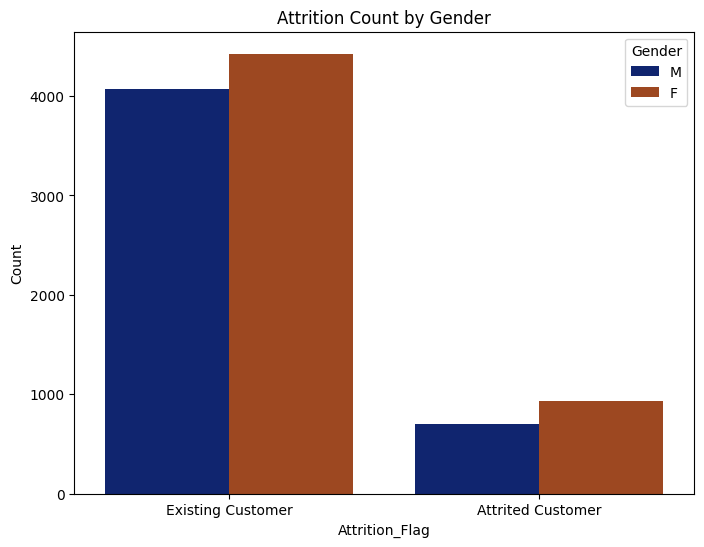

In [24]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Use seaborn for better styling (optional)
sns.countplot(x='Attrition_Flag', hue='Gender', data=creditcarddata, palette='dark')

# Customize the chart
plt.title('Attrition Count by Gender')
plt.xlabel('Attrition_Flag')
plt.ylabel('Count')

# Show legend
plt.legend(title='Gender', loc='upper right')

# Display the chart
plt.show()

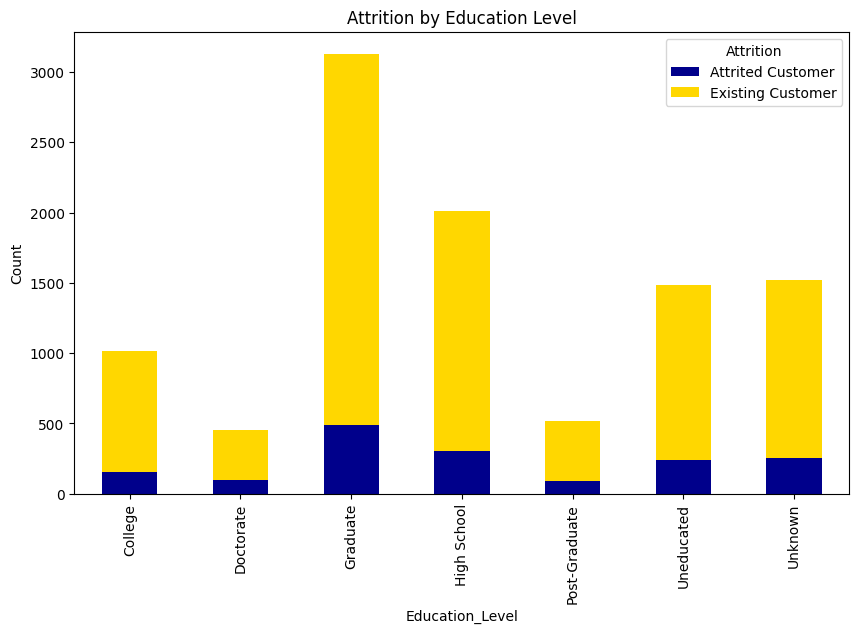

In [25]:
 # Count occurrences of Attrition for each Education_Level
counts = creditcarddata.groupby(['Education_Level', 'Attrition_Flag']).size().unstack(fill_value=0)

# Create a clustered bar chart with Matplotlib
counts.plot(kind='bar', stacked=True, color=['darkblue', 'gold'], figsize=(10, 6))

# Customize the chart
plt.title('Attrition by Education Level')
plt.xlabel('Education_Level')
plt.ylabel('Count')
plt.legend(title='Attrition')

# Show the chart
plt.show()

<Figure size 1000x600 with 0 Axes>

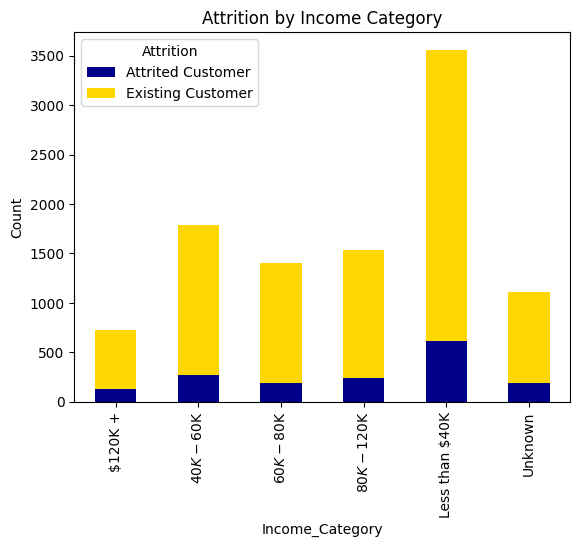

In [26]:
# Count occurrences of Attrition_Flag for each Income_Category
counts = creditcarddata.groupby(['Income_Category', 'Attrition_Flag']).size().reset_index(name='Count')
# Count occurrences of Attrition for each Education_Level
counts = creditcarddata.groupby(['Income_Category', 'Attrition_Flag']).size().unstack(fill_value=0)

# Set a larger figure size
plt.figure(figsize=(10, 6))


# Create a clustered bar chart with Matplotlib
counts.plot(kind='bar', stacked=True, color=['darkblue', 'gold'])


# Customize the chart
plt.title('Attrition by Income Category')
plt.xlabel('Income_Category')
plt.ylabel('Count')
plt.legend(title='Attrition')

# Show the chart
plt.show()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


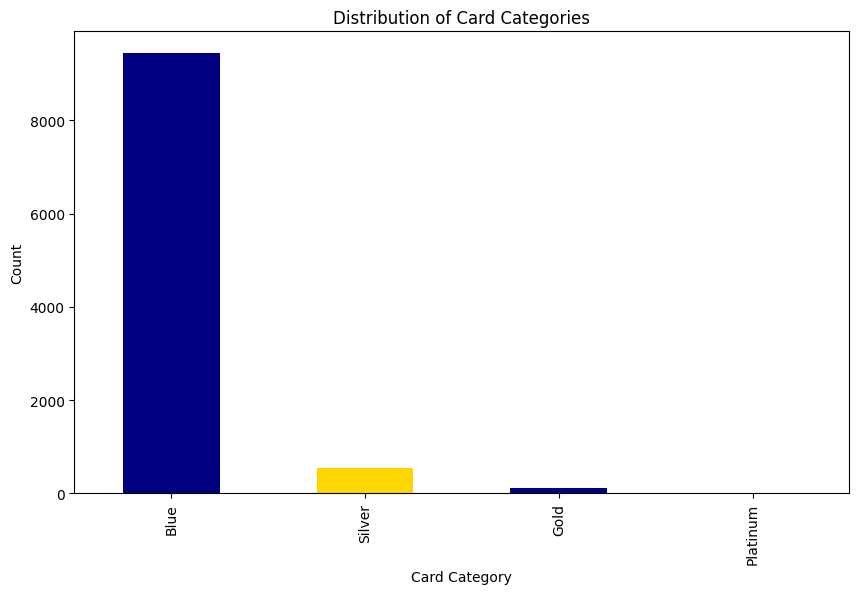

In [27]:
# Prepare data
Card_Category_counts = creditcarddata['Card_Category'].value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
Card_Category_counts.plot(kind='bar', color=['#000080', 'gold'])

# Title and labels
plt.title('Distribution of Card Categories')
plt.xlabel('Card Category')
plt.ylabel('Count')

# Print the value counts
print(Card_Category_counts)

# Display the chart
plt.show()

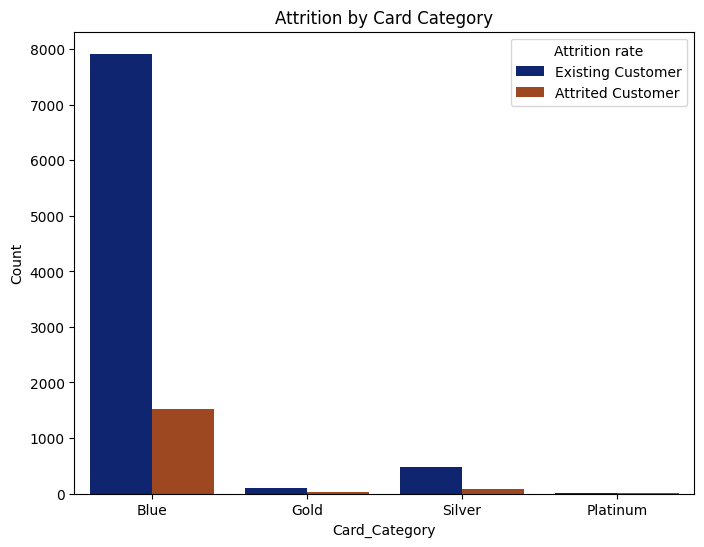

In [28]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Use seaborn for better styling (optional)
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=creditcarddata, palette='dark')

# Customize the chart
plt.title('Attrition by Card Category')
plt.xlabel('Card_Category')
plt.ylabel('Count')

# Show legend
plt.legend(title='Attrition rate', loc='upper right')

# Display the chart
plt.show()

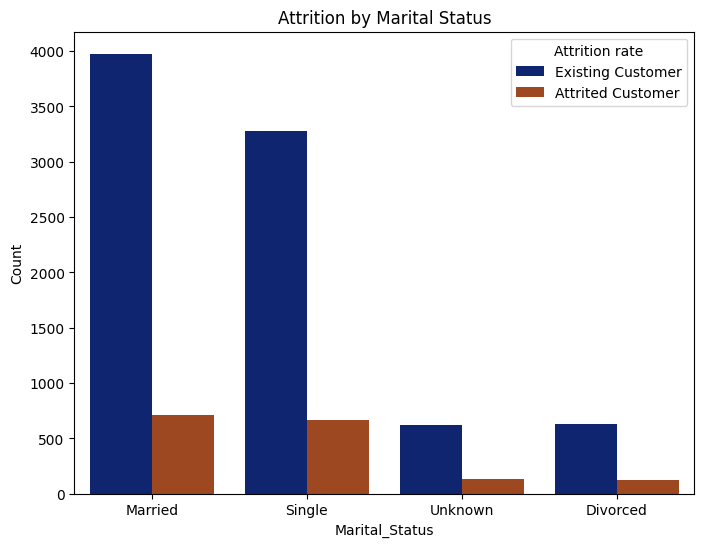

In [29]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Use seaborn for better styling (optional)
sns.countplot(x='Marital_Status', hue='Attrition_Flag', data=creditcarddata, palette='dark')

# Customize the chart
plt.title('Attrition by Marital Status')
plt.xlabel('Marital_Status')
plt.ylabel('Count')

# Show legend
plt.legend(title='Attrition rate', loc='upper right')

# Display the chart
plt.show()

### <span style="color:black">Numerical Column:
    Customer Age
    Dependent Count
    Months on Book
    Total Relationship Count
    Months Inactive (12 Months)
    Credit Limit
    Total Transaction Amount
    Average Utilization Ratio

array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Months_on_book'}>],
       [<Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>],
       [<Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>, <Axes: >]],
      dtype=object)

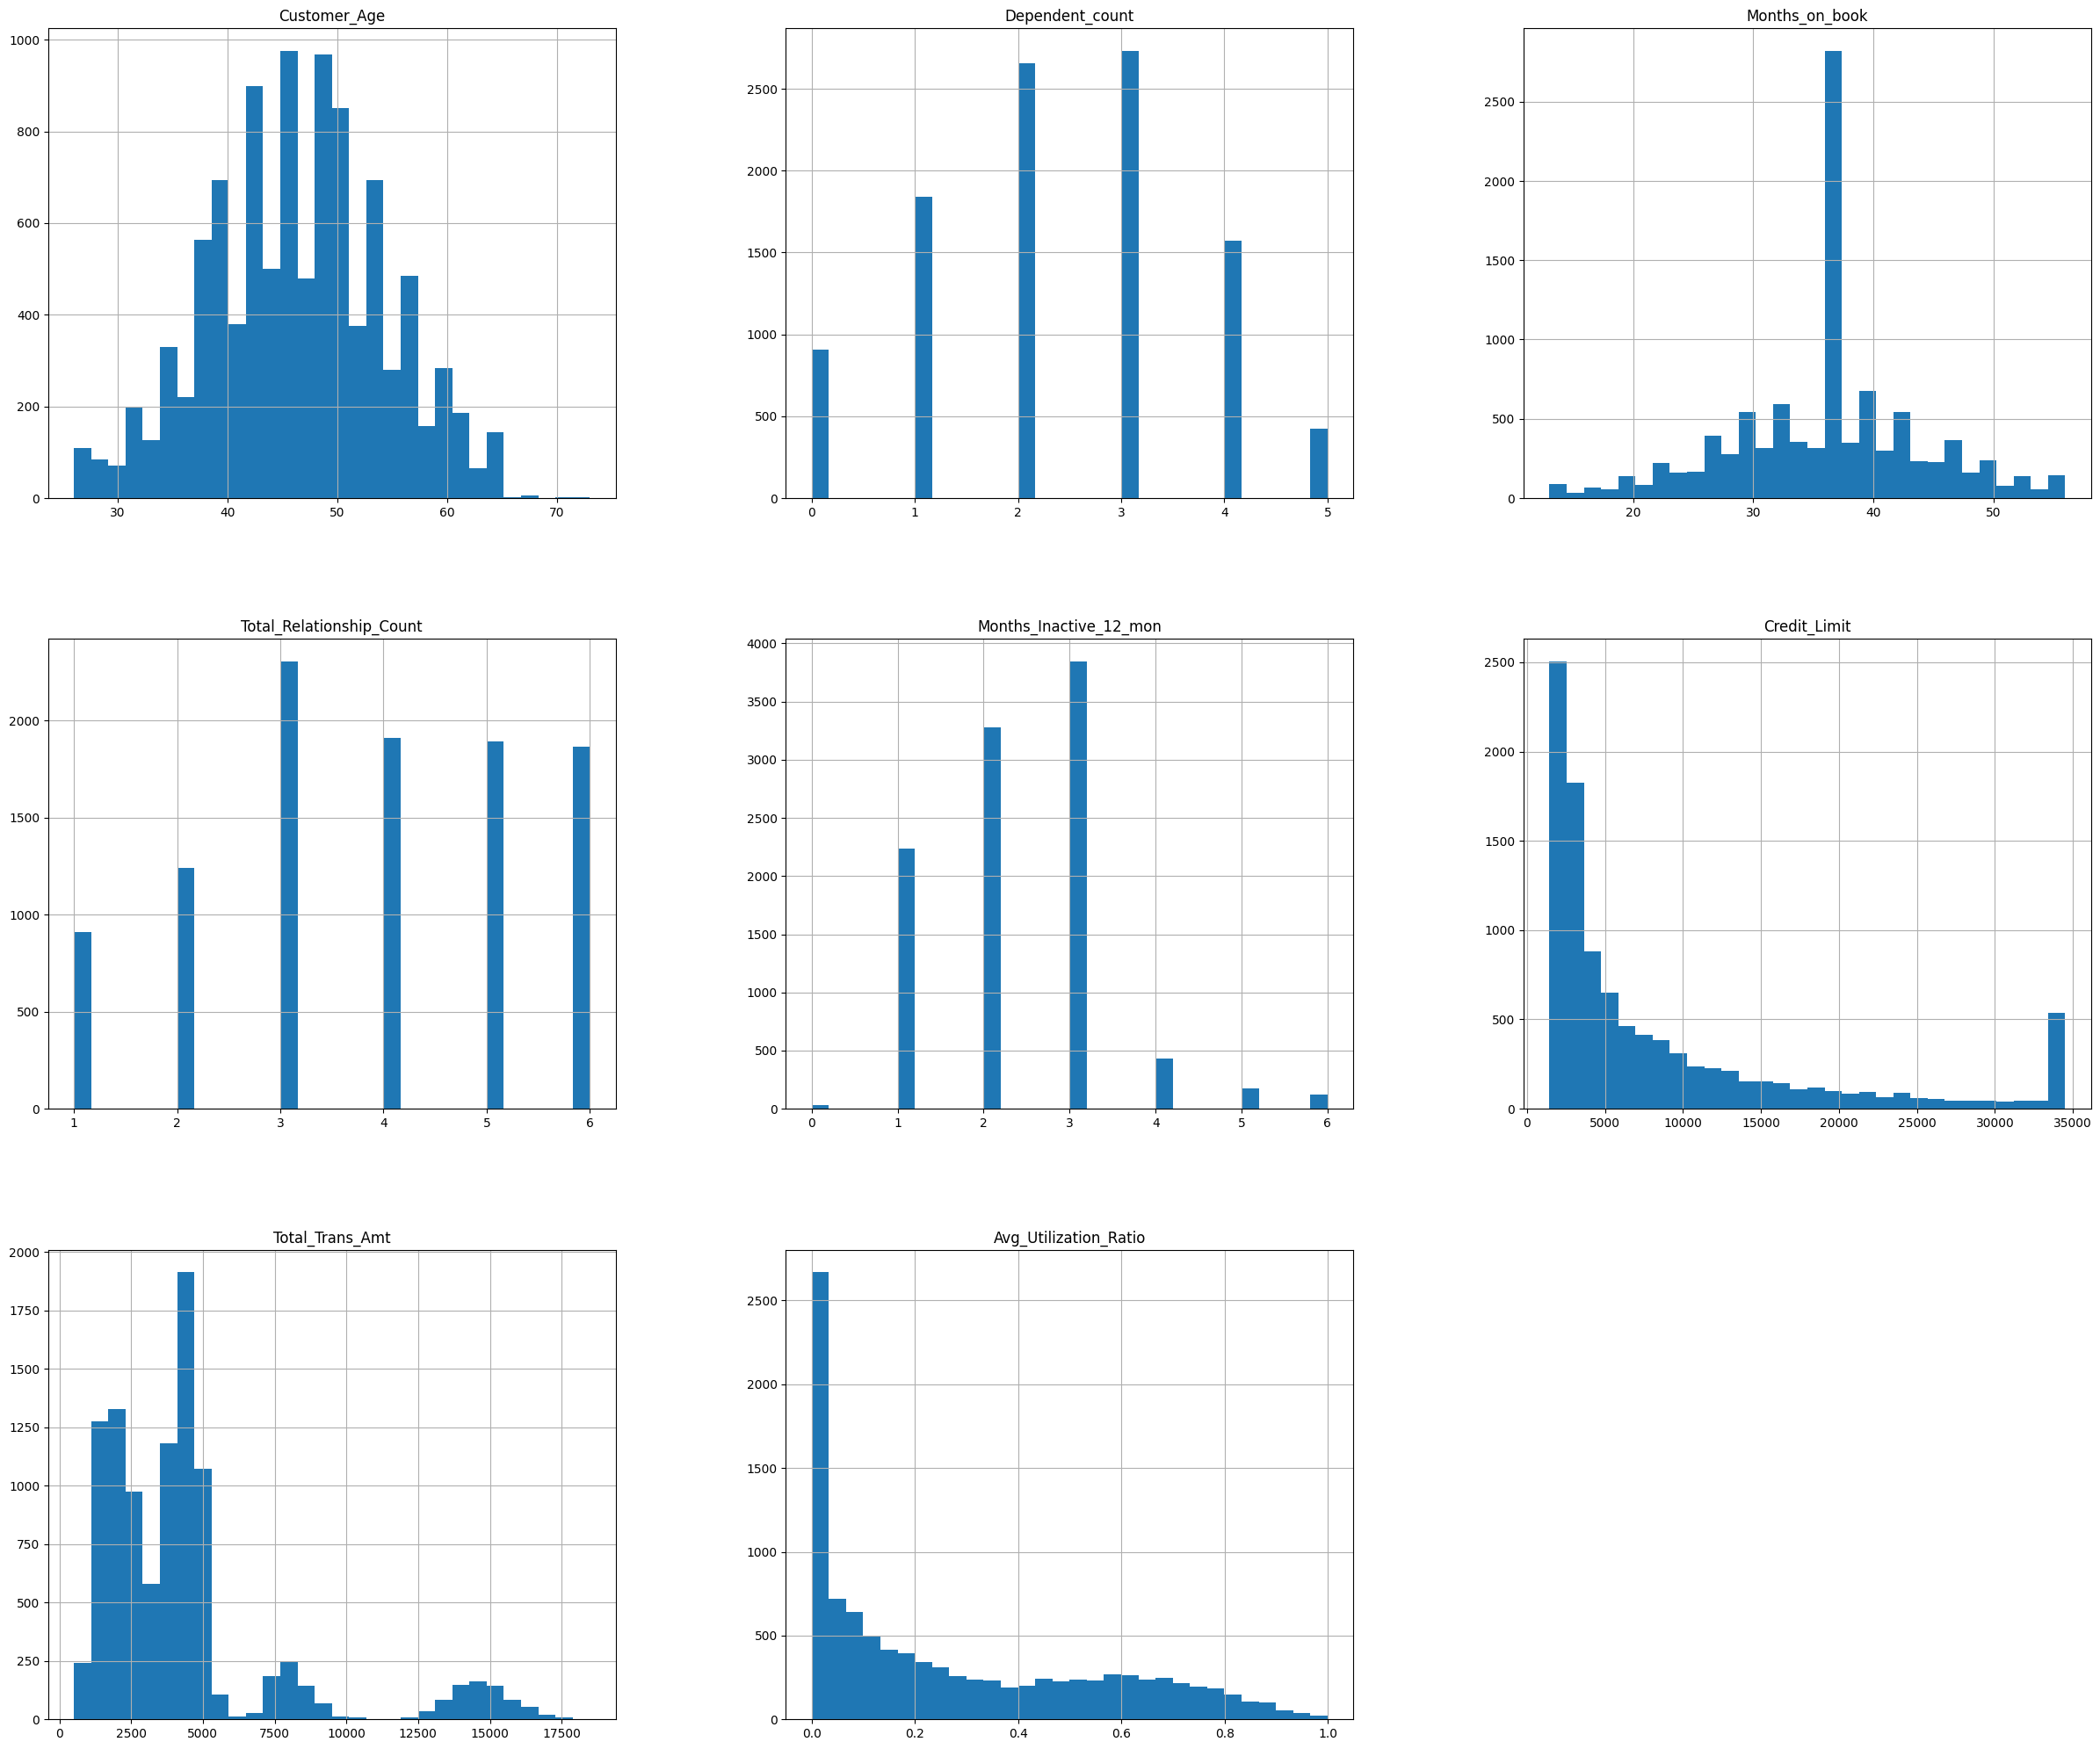

In [30]:
hists = creditcarddata[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']]
hists.hist(bins = 30, figsize = (30,25))#, color = 'lightgrey')

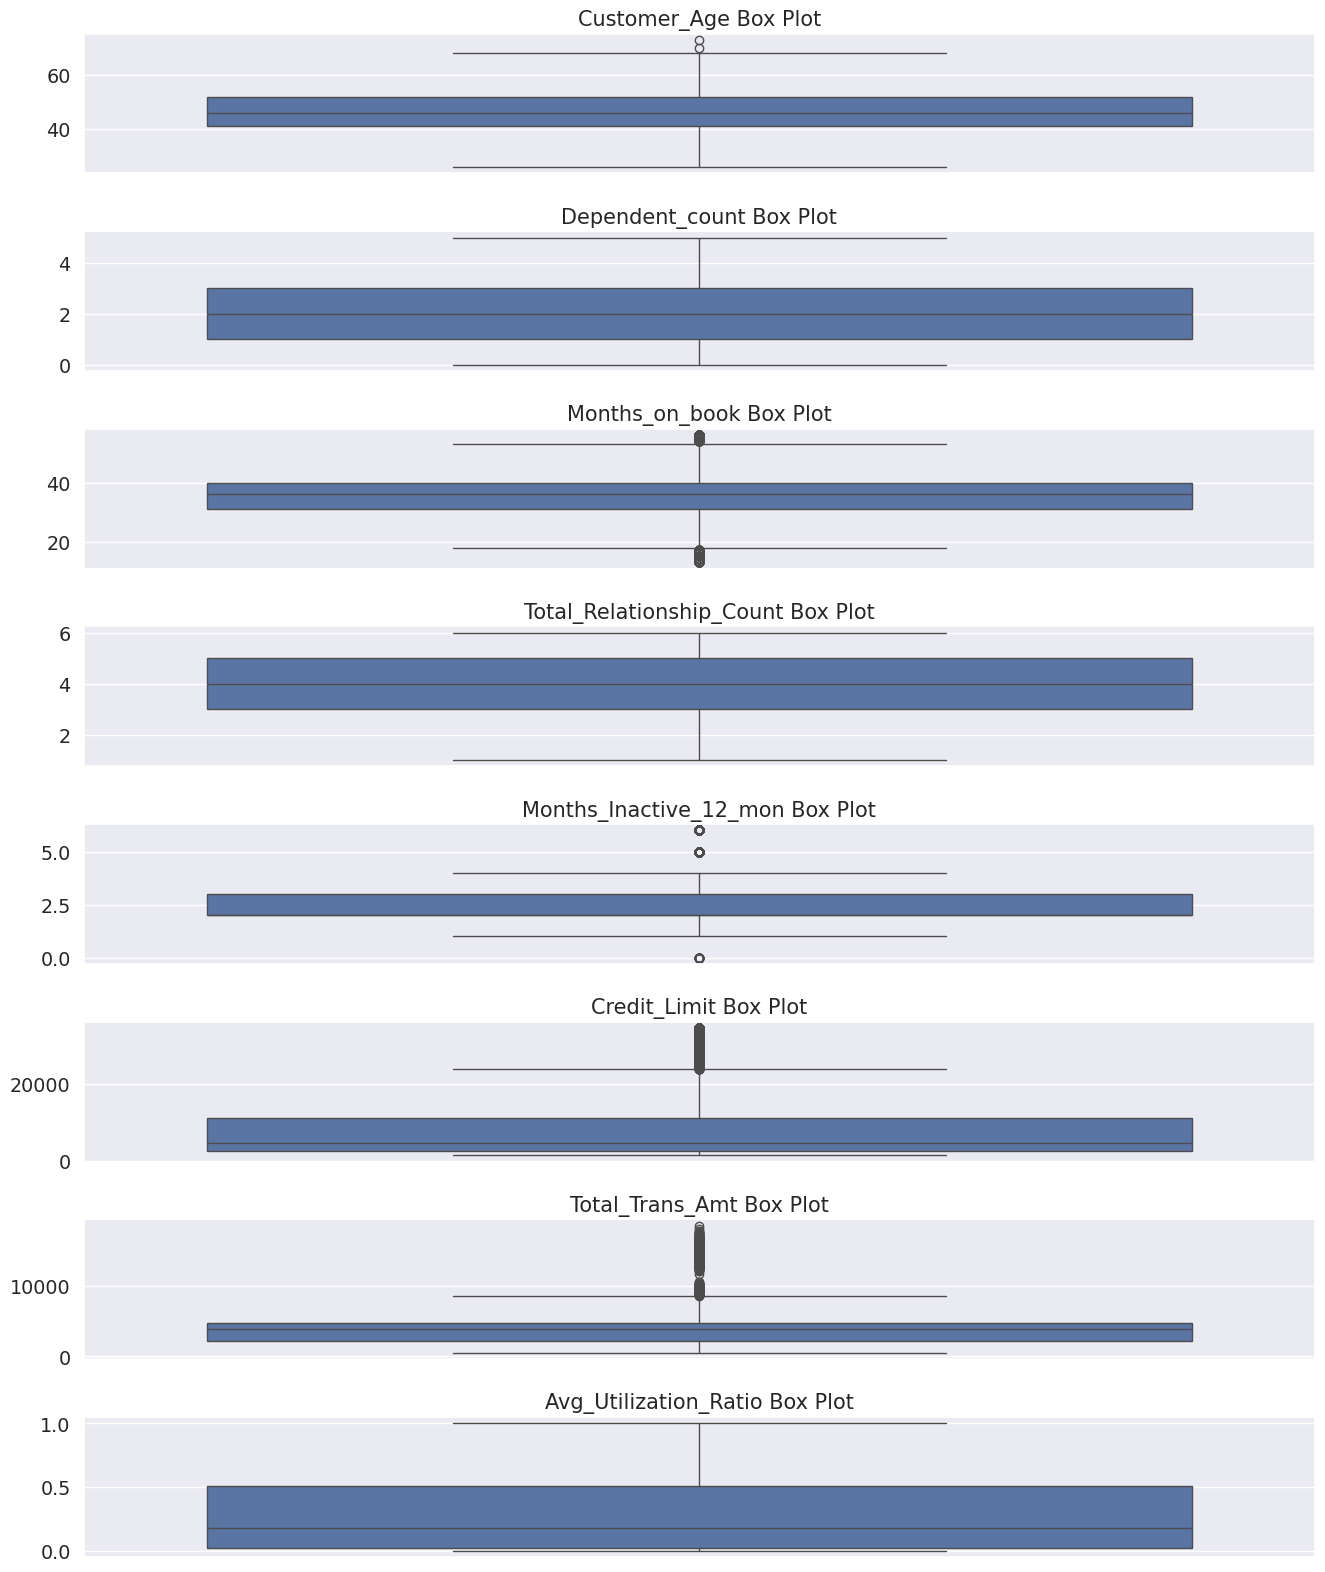

In [31]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.5)
fig.set_size_inches(13.5, 16)
sns.set(font_scale = 1.25)

boxs = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

i = 1
for var in boxs:
    fig.add_subplot(8, 1, i)
    sns.boxplot(pd.Series(creditcarddata[var], name='')).set_title(var + " Box Plot")
    i += 1

fig.tight_layout()

## <span style="color:black">Data Preprocessing and Feature Reduction</span>


### <span style="color:black">Step 1: Encode Categorical Variables, Remove Missing Data and Drop Unneeded Columns</span>

In [32]:
creditcarddata['Attrition_Flag'] = creditcarddata['Attrition_Flag'].replace({'Attrited Customer':1, 'Existing Customer':0})
creditcarddata['Gender'] = creditcarddata['Gender'].replace({'F':1, 'M':0})

creditcarddata = pd.concat([creditcarddata, pd.get_dummies(creditcarddata['Education_Level']).drop(columns=['Unknown'])], axis=1)
creditcarddata = pd.concat([creditcarddata, pd.get_dummies(creditcarddata['Income_Category']).drop(columns=['Unknown'])], axis=1)
creditcarddata = pd.concat([creditcarddata, pd.get_dummies(creditcarddata['Marital_Status']).drop(columns=['Unknown'])], axis=1)
creditcarddata = pd.concat([creditcarddata, pd.get_dummies(creditcarddata['Card_Category']).drop(columns=['Platinum'])], axis=1)

 ### <span style="color:black">Drop Unneeded Columns from Dataset</span>

In [33]:
creditcarddata.drop(columns = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category', 'CLIENTNUM'], inplace=True)

In [34]:
creditcarddata.shape

(10127, 33)

### <span style="color:black">New Dataset Dimensions</span>

In [35]:
creditcarddata

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,False,True,False,False,False,True,False,True,False,False
1,0,49,1,5,44,6,1,2,8256.0,864,...,False,False,False,True,False,False,True,True,False,False
2,0,51,0,3,36,4,1,0,3418.0,0,...,False,False,True,False,False,True,False,True,False,False
3,0,40,1,4,34,3,4,1,3313.0,2517,...,False,False,False,True,False,False,False,True,False,False
4,0,40,0,3,21,5,1,0,4716.0,0,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,40,3,2,3,4003.0,1851,...,True,False,False,False,False,False,True,True,False,False
10123,1,41,0,2,25,4,2,3,4277.0,2186,...,True,False,False,False,True,False,False,True,False,False
10124,1,44,1,1,36,5,3,4,5409.0,0,...,False,False,False,True,False,True,False,True,False,False
10125,1,30,0,2,36,4,3,3,5281.0,0,...,True,False,False,False,False,False,False,True,False,False


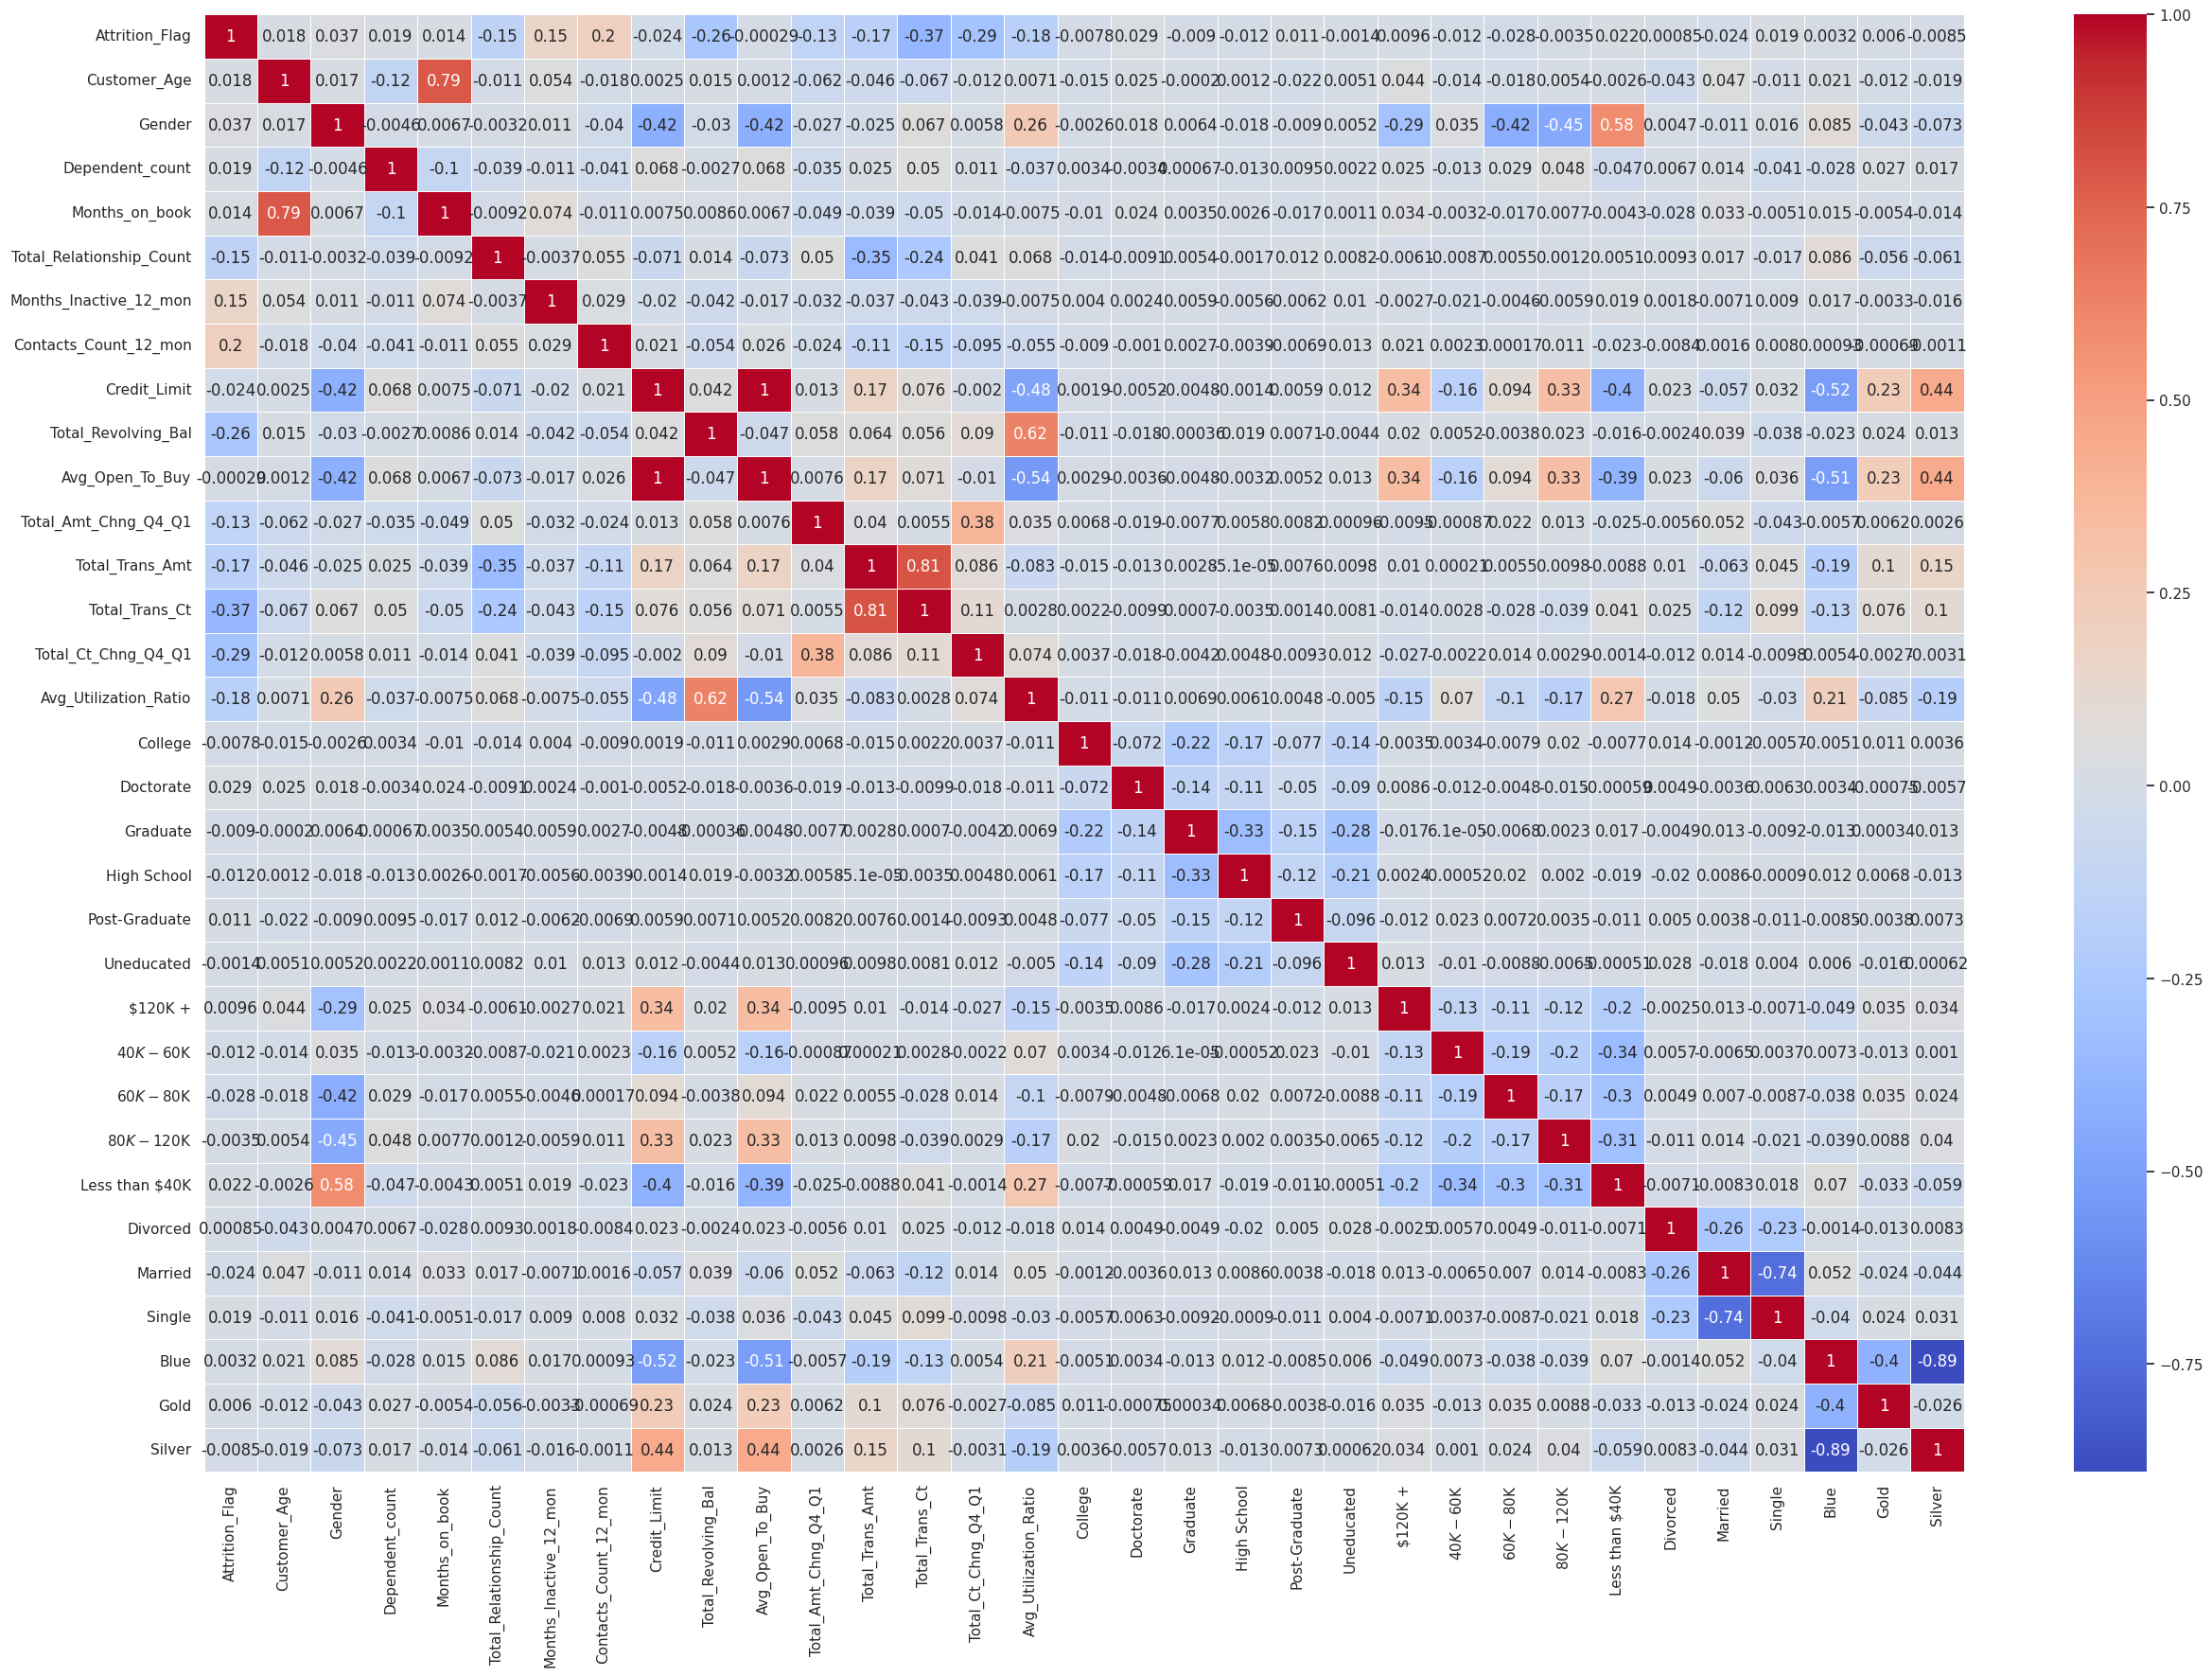

In [36]:

fig = plt.figure()
fig.set_size_inches(30, 20)
sns.set(font_scale=1)

sns.heatmap(creditcarddata.corr('pearson'), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

From the above correlation matrix, we can see that there are now quite a few variables and using all of them for modeling could pose to be a problem. We will up-sample the data to even out the skewedness of the attrited customers.

### <span style="color:black">Step 2: Up-sample the Dataset Using SMOTE</span>

In [37]:
smote_sample = SMOTE()

X, y = smote_sample.fit_resample(creditcarddata[creditcarddata.columns[1:]], creditcarddata[creditcarddata.columns[0]])

up_sampData = X.assign(Attrition = y)

In [38]:
up_sampData

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver,Attrition
0,45,0,3,39,5,1,3,12691.000000,777,11914.000000,...,True,False,False,False,True,False,True,False,False,0
1,49,1,5,44,6,1,2,8256.000000,864,7392.000000,...,False,False,True,False,False,True,True,False,False,0
2,51,0,3,36,4,1,0,3418.000000,0,3418.000000,...,False,True,False,False,True,False,True,False,False,0
3,40,1,4,34,3,4,1,3313.000000,2517,796.000000,...,False,False,True,False,False,False,True,False,False,0
4,40,0,3,21,5,1,0,4716.000000,0,4716.000000,...,True,False,False,False,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,54,1,2,48,3,3,3,1808.654127,0,1808.654127,...,False,False,True,False,True,False,True,False,False,1
16996,53,0,2,46,3,2,2,2758.998361,2432,326.729836,...,False,True,False,False,True,True,True,False,False,1
16997,33,1,1,36,3,2,3,1553.113578,0,1553.113578,...,False,False,True,False,False,True,True,False,False,1
16998,50,0,2,31,3,2,2,8979.073126,0,8979.073126,...,True,False,True,False,True,True,True,False,False,1


In [39]:
up_sampData

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver,Attrition
0,45,0,3,39,5,1,3,12691.000000,777,11914.000000,...,True,False,False,False,True,False,True,False,False,0
1,49,1,5,44,6,1,2,8256.000000,864,7392.000000,...,False,False,True,False,False,True,True,False,False,0
2,51,0,3,36,4,1,0,3418.000000,0,3418.000000,...,False,True,False,False,True,False,True,False,False,0
3,40,1,4,34,3,4,1,3313.000000,2517,796.000000,...,False,False,True,False,False,False,True,False,False,0
4,40,0,3,21,5,1,0,4716.000000,0,4716.000000,...,True,False,False,False,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,54,1,2,48,3,3,3,1808.654127,0,1808.654127,...,False,False,True,False,True,False,True,False,False,1
16996,53,0,2,46,3,2,2,2758.998361,2432,326.729836,...,False,True,False,False,True,True,True,False,False,1
16997,33,1,1,36,3,2,3,1553.113578,0,1553.113578,...,False,False,True,False,False,True,True,False,False,1
16998,50,0,2,31,3,2,2,8979.073126,0,8979.073126,...,True,False,True,False,True,True,True,False,False,1


In [40]:
X

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,45,0,3,39,5,1,3,12691.000000,777,11914.000000,...,False,True,False,False,False,True,False,True,False,False
1,49,1,5,44,6,1,2,8256.000000,864,7392.000000,...,False,False,False,True,False,False,True,True,False,False
2,51,0,3,36,4,1,0,3418.000000,0,3418.000000,...,False,False,True,False,False,True,False,True,False,False
3,40,1,4,34,3,4,1,3313.000000,2517,796.000000,...,False,False,False,True,False,False,False,True,False,False
4,40,0,3,21,5,1,0,4716.000000,0,4716.000000,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,54,1,2,48,3,3,3,1808.654127,0,1808.654127,...,True,False,False,True,False,True,False,True,False,False
16996,53,0,2,46,3,2,2,2758.998361,2432,326.729836,...,True,False,True,False,False,True,True,True,False,False
16997,33,1,1,36,3,2,3,1553.113578,0,1553.113578,...,False,False,False,True,False,False,True,True,False,False
16998,50,0,2,31,3,2,2,8979.073126,0,8979.073126,...,False,True,False,True,False,True,True,True,False,False


In [41]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16995    1
16996    1
16997    1
16998    1
16999    1
Name: Attrition_Flag, Length: 17000, dtype: int64

In [42]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [43]:
X_scaled

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,-0.179592,-0.949620,0.640961,0.424755,1.029402,-1.494196,0.463063,0.472303,-0.202076,0.492096,...,-0.545083,2.215148,-0.489960,-0.880811,-0.339724,0.913925,-0.987258,0.234904,-0.133346,-0.269988
1,0.363876,1.053052,2.285194,1.103967,1.690472,-1.494196,-0.511927,-0.015198,-0.104464,-0.004955,...,-0.545083,-0.451437,-0.489960,1.135317,-0.339724,-1.094182,1.012907,0.234904,-0.133346,-0.269988
2,0.635610,-0.949620,0.640961,0.017228,0.368333,-1.494196,-2.461908,-0.546998,-1.073852,-0.441770,...,-0.545083,-0.451437,2.040981,-0.880811,-0.339724,0.913925,-0.987258,0.234904,-0.133346,-0.269988
3,-0.858927,1.053052,1.463077,-0.254457,-0.292737,1.800115,-1.486918,-0.558540,1.750163,-0.729975,...,-0.545083,-0.451437,-0.489960,1.135317,-0.339724,-1.094182,-0.987258,0.234904,-0.133346,-0.269988
4,-0.858927,-0.949620,0.640961,-2.020407,1.029402,-1.494196,-2.461908,-0.404320,-1.073852,-0.299096,...,-0.545083,2.215148,-0.489960,-0.880811,-0.339724,0.913925,-0.987258,0.234904,-0.133346,-0.269988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,1.043211,1.053052,-0.181156,1.647336,-0.292737,0.702011,0.463063,-0.723900,-1.073852,-0.618666,...,1.834582,-0.451437,-0.489960,1.135317,-0.339724,0.913925,-0.987258,0.234904,-0.133346,-0.269988
16996,0.907344,-0.949620,-0.181156,1.375651,-0.292737,-0.396092,-0.511927,-0.619436,1.654795,-0.781557,...,1.834582,-0.451437,2.040981,-0.880811,-0.339724,0.913925,1.012907,0.234904,-0.133346,-0.269988
16997,-1.809996,1.053052,-1.003272,0.017228,-0.292737,-0.396092,0.463063,-0.751989,-1.073852,-0.646755,...,-0.545083,-0.451437,-0.489960,1.135317,-0.339724,-1.094182,1.012907,0.234904,-0.133346,-0.269988
16998,0.499743,-0.949620,-0.181156,-0.661984,-0.292737,-0.396092,-0.511927,0.064283,-1.073852,0.169494,...,-0.545083,2.215148,-0.489960,1.135317,-0.339724,0.913925,1.012907,0.234904,-0.133346,-0.269988


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=123)

In [45]:
X_train.shape

(11900, 32)

In [46]:
X_test.shape

(5100, 32)

In [47]:
y_test.shape

(5100,)

In [48]:
y_train.shape

(11900,)

In [49]:
y_train.shape

(11900,)

In [50]:
y_test.shape

(5100,)

In [51]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred = model1.predict(X_test)

In [53]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

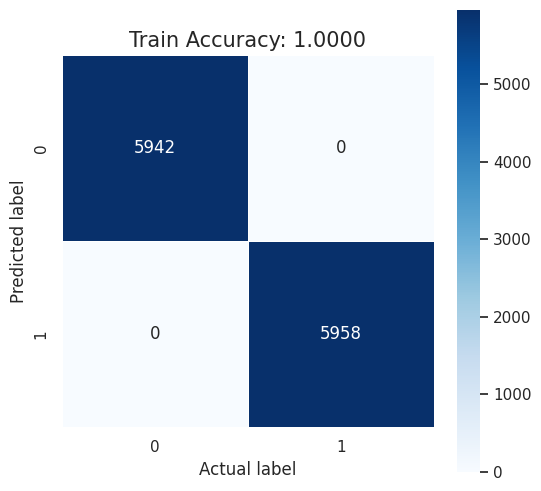

In [54]:

# Make predictions on the training set
prediction_train = model1.predict(X_train)

# Generate confusion matrix
cm = confusion_matrix(y_train, prediction_train)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
all_sample_title = 'Train Accuracy: {:.4f}'.format(accuracy_score(y_train, prediction_train))
plt.title(all_sample_title, size=15)
plt.show()

In [55]:
y_pred_train = model1.predict(X_train)
print("Classification Report for Training Data:\n", classification_report(y_train, y_pred_train))

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



**TESTING MODEL PERFORMANCE**

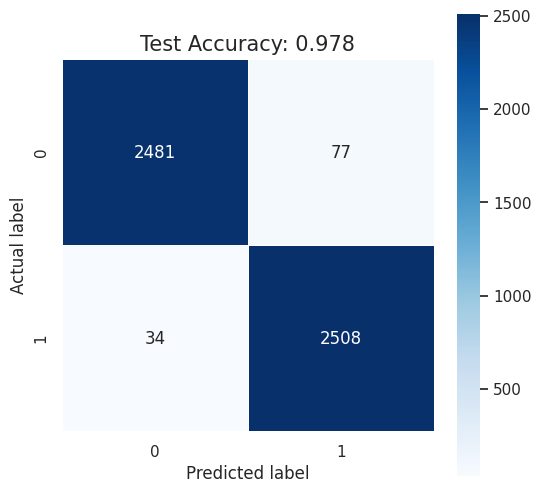

In [56]:
#Testing Performance
# Make predictions on the testing set

prediction_test = model1.predict(X_test)

# Generate confusion matrix
cm_test = confusion_matrix(y_test, prediction_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test Accuracy: {:.3f}'.format(accuracy_score(y_test, prediction_test))
plt.title(all_sample_title, size=15)
plt.show()

In [57]:
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy:{}%".format(100*accuracy))

Accuracy:97.82352941176471%


In [58]:
y_pred_test = model1.predict(X_test)
print("Classification Report for Test Data:\n", classification_report(y_test, y_pred_test))

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2558
           1       0.97      0.99      0.98      2542

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100



In [59]:
#XGB CLASSIFIER
model2 = XGBClassifier()

In [60]:
model2.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
y_pred = model2.predict(X_test)

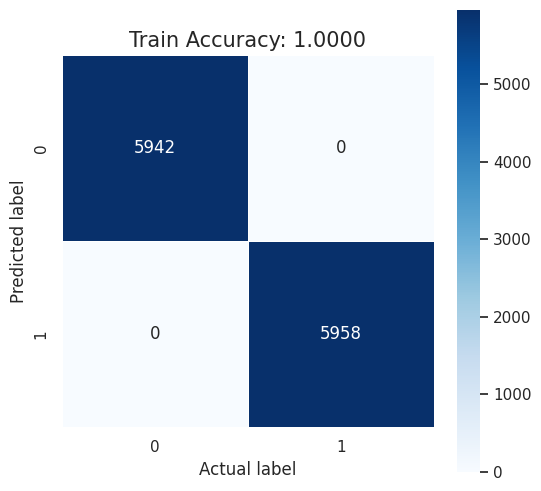

In [62]:
# Make predictions on the training set
prediction_train = model2.predict(X_train)

# Generate confusion matrix
cm = confusion_matrix(y_train, prediction_train)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
all_sample_title = 'Train Accuracy: {:.4f}'.format(accuracy_score(y_train, prediction_train))
plt.title(all_sample_title, size=15)
plt.show()

In [63]:
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy:{}%".format(100*accuracy))

Accuracy:98.25490196078431%


In [64]:
y_pred_train = model2.predict(X_train)
print("Classification Report for Training Data:\n", classification_report(y_train, y_pred_train))

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



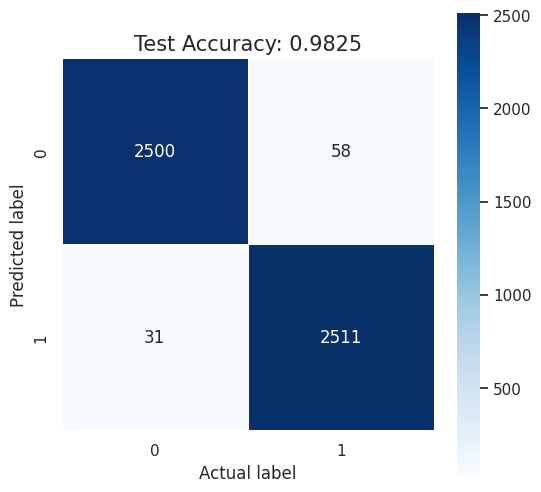

In [65]:
# Make predictions on the training set
prediction_test = model2.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, prediction_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
all_sample_title = 'Test Accuracy: {:.4f}'.format(accuracy_score(y_test, prediction_test))
plt.title(all_sample_title, size=15)
plt.show()

In [66]:
y_pred_test = model2.predict(X_test)
print("Classification Report for Test Data:\n", classification_report(y_test, y_pred_test))

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2558
           1       0.98      0.99      0.98      2542

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100



In [67]:
#DECISION TREE CLASSIFIER
model3 = DecisionTreeClassifier()

In [68]:
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
# y_pred = model3.predict(X_test)

In [70]:
accuracy = model3.score(X_train, y_train)
print("Accuracy:{}%".format(100*accuracy))

Accuracy:100.0%


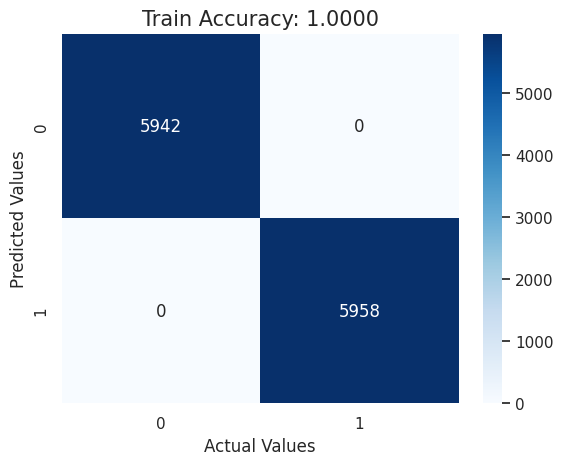

In [71]:
#Training the model
y_pred = model3.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
all_sample_title = 'Train Accuracy: {:.4f}'.format(accuracy_score(y_train, prediction_train))
plt.title(all_sample_title, size=15)

plt.show()


In [72]:
y_pred_train = model3.predict(X_train)
print("Classification Report for Training Data:\n", classification_report(y_train, y_pred_train))

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



**TESTING THE PERFORMANCE**

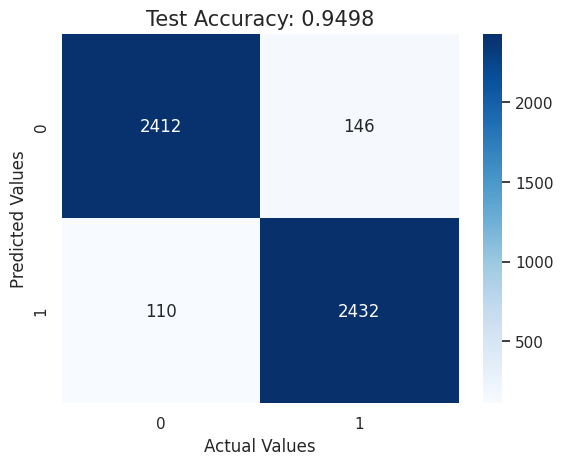

In [73]:
#Testing the model
y_pred = model3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
all_sample_title = 'Test Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)

plt.show()


In [74]:
y_pred_test = model3.predict(X_test)
print("Classification Report for Test Data:\n", classification_report(y_test, y_pred_test))

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2558
           1       0.94      0.96      0.95      2542

    accuracy                           0.95      5100
   macro avg       0.95      0.95      0.95      5100
weighted avg       0.95      0.95      0.95      5100



LOGISTIC REGRESSION

In [75]:
#LOGISTIC REGRESSION
model4 = LogisticRegression(max_iter =2000)

In [76]:
model4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=2000)

In [77]:
y_pred = model4.predict(X_test)

In [78]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

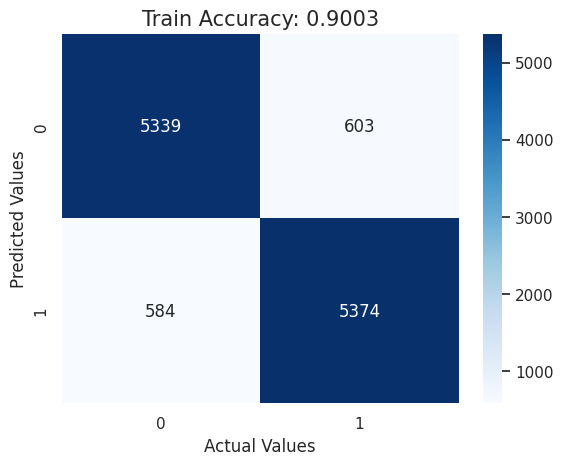

In [79]:
#Training the model
y_pred = model4.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
all_sample_title = 'Train Accuracy: {:.4f}'.format(accuracy_score(y_train, y_pred))
plt.title(all_sample_title, size=15)

plt.show()


In [80]:
y_pred_train = model4.predict(X_train)
print("Classification Report for Training Data:\n", classification_report(y_train, y_pred_train))

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5942
           1       0.90      0.90      0.90      5958

    accuracy                           0.90     11900
   macro avg       0.90      0.90      0.90     11900
weighted avg       0.90      0.90      0.90     11900



**TESTING THE PERFORMANCE**

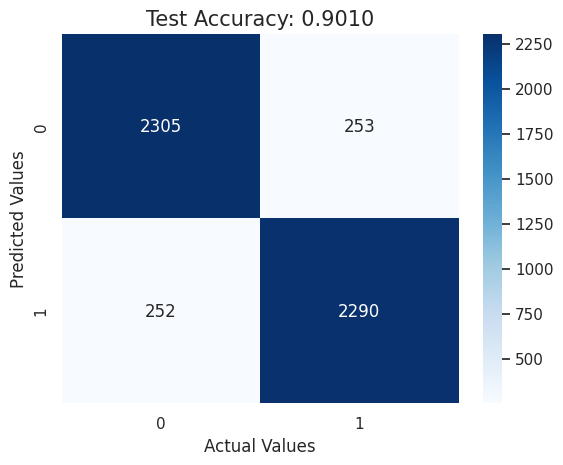

In [81]:
#Testing the model
y_pred = model4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
all_sample_title = 'Test Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)

plt.show()



In [82]:
y_pred_test = model4.predict(X_test)
print("Classification Report for Test Data:\n", classification_report(y_test, y_pred_test))

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      2558
           1       0.90      0.90      0.90      2542

    accuracy                           0.90      5100
   macro avg       0.90      0.90      0.90      5100
weighted avg       0.90      0.90      0.90      5100



MODEL TRAINING SUMMARY

TRAINING

In [83]:
from tabulate import tabulate

# Replace these with your actual scores
lr_recall = 0.90
xg_recall = 1.00
dt_recall = 1.00
rf_recall = 1.00

# Placeholder values for accuracy, precision, and f1_score
lr_accuracy = 0.89
xg_accuracy = 1.00
dt_accuracy = 1.00
rf_accuracy = 1.00

lr_precision = 0.88
xg_precision = 1.00
dt_precision = 1.00
rf_precision = 1.00

lr_f1_score = 0.89
xg_f1_score = 1.00
dt_f1_score = 1.00
rf_f1_score = 1.00

# Creating a DataFrame
metrics_df = pd.DataFrame({
    'Model Type': ['Logistic Regression', 'XG Boost Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Recall Score': [lr_recall, xg_recall, dt_recall, rf_recall],
    'Accuracy': [lr_accuracy, xg_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [lr_precision, xg_precision, dt_precision, rf_precision],
    'F1 Score': [lr_f1_score, xg_f1_score, dt_f1_score, rf_f1_score]
})

# Sorting the DataFrame by Recall Score in descending order
metrics_df = metrics_df.sort_values(by='Recall Score', ascending=False).reset_index(drop=True)

# Set the title of the table
table_title = 'Training Results'


# Apply styling to the DataFrame
styled_df = metrics_df.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'tbody', 'props': [('color', 'darkslategray')]},
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]},
    {'selector': 'tr:hover', 'props': [('background-color', 'lightyellow')]}
]).set_properties(**{'background-color': 'lightyellow', 'color': 'black'})


# Print the title
print(f"\n{table_title}\n")

# Display the table using tabulate with centered figures and specified colors
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False,
               numalign='center', stralign='center', colalign=['center'] * 5,))




Training Results

╒══════════════════════════╤════════════════╤════════════╤═════════════╤════════════╕
│        Model Type        │  Recall Score  │  Accuracy  │  Precision  │  F1 Score  │
╞══════════════════════════╪════════════════╪════════════╪═════════════╪════════════╡
│   XG Boost Classifier    │       1        │     1      │      1      │     1      │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│ Decision Tree Classifier │       1        │     1      │      1      │     1      │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│ Random Forest Classifier │       1        │     1      │      1      │     1      │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│   Logistic Regression    │      0.9       │    0.89    │    0.88     │    0.89    │
╘══════════════════════════╧════════════════╧════════════╧═════════════╧════════════╛


TESTING

In [84]:
# Replace these with your actual scores
lr_recall = 0.98
xg_recall = 0.99
dt_recall = 0.95
rf_recall = 0.98

# Placeholder values for accuracy, precision, and f1_score
lr_accuracy = 0.88
xg_accuracy = 0.99
dt_accuracy = 0.95
rf_accuracy = 0.98

lr_precision = 0.88
xg_precision = 0.99
dt_precision = 0.95
rf_precision = 0.98

lr_f1_score = 0.88
xg_f1_score = 0.99
dt_f1_score = 0.95
rf_f1_score = 0.98

# Creating a DataFrame
metrics_df = pd.DataFrame({
    'Model Type': ['Logistic Regression', 'XG Boost Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Recall Score': [lr_recall, xg_recall, dt_recall, rf_recall],
    'Accuracy': [lr_accuracy, xg_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [lr_precision, xg_precision, dt_precision, rf_precision],
    'F1 Score': [lr_f1_score, xg_f1_score, dt_f1_score, rf_f1_score]
})

# Sorting the DataFrame by Recall Score in descending order
metrics_df = metrics_df.sort_values(by='Recall Score', ascending=False).reset_index(drop=True)

# Set the title of the table
table_title = 'Testing Results'


# Apply styling to the DataFrame
styled_df = metrics_df.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'tbody', 'props': [('color', 'darkslategray')]},
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]},
    {'selector': 'tr:hover', 'props': [('background-color', 'lightyellow')]}
]).set_properties(**{'background-color': 'lightyellow', 'color': 'black'})


# Print the title
print(f"\n{table_title}\n")

# Display the table using tabulate with centered figures and specified colors
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False,
               numalign='center', stralign='center', colalign=['center'] * 5,))



Testing Results

╒══════════════════════════╤════════════════╤════════════╤═════════════╤════════════╕
│        Model Type        │  Recall Score  │  Accuracy  │  Precision  │  F1 Score  │
╞══════════════════════════╪════════════════╪════════════╪═════════════╪════════════╡
│   XG Boost Classifier    │      0.99      │    0.99    │    0.99     │    0.99    │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│   Logistic Regression    │      0.98      │    0.88    │    0.88     │    0.88    │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│ Random Forest Classifier │      0.98      │    0.98    │    0.98     │    0.98    │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│ Decision Tree Classifier │      0.95      │    0.95    │    0.95     │    0.95    │
╘══════════════════════════╧════════════════╧════════════╧═════════════╧════════════╛


**HYPERPARAMETER TUNING**

In [85]:
#Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X_train and y_train defined

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomizedSearchCV object
rf_model = RandomForestClassifier()
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


In [86]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for DecisionTreeClassifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Set max_features explicitly
}

# Create DecisionTreeClassifier instance
dt_model = DecisionTreeClassifier(random_state=123)

# Create GridSearchCV object
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters
print("Best hyperparameters for DecisionTreeClassifier:", grid_search_dt.best_params_)


Best hyperparameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


In [ ]:
#Hyperparameter tuning for XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create XGBClassifier instance
xgb_model = XGBClassifier(random_state=123)

# Create RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_grid_xgb,
                                        n_iter=10, cv=5, scoring='accuracy', random_state=123)

# Fit the random search to the data
random_search_xgb.fit(X_train, y_train)

# Print the best parameters
print("Best hyperparameters for XGBoost:", random_search_xgb.best_params_)



In [88]:
#Hyperparameter tuning for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression object
lr = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.9180672268907563


In [89]:
# After hyperparameter tuning for RandomForestClassifier
best_rf_model = random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_train)

print("Classification Report for Training Split RandomForestClassifier:\n", classification_report(y_train, y_pred_rf))

Classification Report for Training Split RandomForestClassifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



In [90]:
# After hyperparameter tuning for RandomForestClassifier
best_rf_model = random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("Classification Report for Testing Split RandomForestClassifier:\n", classification_report(y_test, y_pred_rf))


Classification Report for Testing Split RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2558
           1       0.97      0.98      0.98      2542

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100



In [91]:
# After hyperparameter tuning for DecisionTreeClassifier
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_train)
print("Classification Report for Training Split DecisionTreeClassifier:\n", classification_report(y_train, y_pred_dt))

Classification Report for Training Split DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5942
           1       0.99      0.98      0.99      5958

    accuracy                           0.99     11900
   macro avg       0.99      0.99      0.99     11900
weighted avg       0.99      0.99      0.99     11900



In [92]:
# After hyperparameter tuning for DecisionTreeClassifier
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
print("Classification Report for Test Split DecisionTreeClassifier:\n", classification_report(y_test, y_pred_dt))

Classification Report for Test Split DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      2558
           1       0.91      0.92      0.92      2542

    accuracy                           0.92      5100
   macro avg       0.92      0.92      0.92      5100
weighted avg       0.92      0.92      0.92      5100



In [93]:
# After hyperparameter tuning for XGBClassifier
best_xgb_model = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_train)
print("Classification Report for XGBClassifier:\n", classification_report(y_train, y_pred_xgb))

Classification Report for XGBClassifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



In [94]:
# After hyperparameter tuning for XGBClassifier
best_xgb_model = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
print("Classification Report for XGBClassifier:\n", classification_report(y_test, y_pred_xgb))

Classification Report for XGBClassifier:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2558
           1       0.98      0.99      0.98      2542

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100



In [95]:
# After hyperparameter tuning for Logistic Regression
best_lr_model = grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_train)
print("Classification Report for Training Split Logistic Regression:\n", classification_report(y_train, y_pred_lr))

Classification Report for Training Split Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      5942
           1       0.93      0.91      0.92      5958

    accuracy                           0.92     11900
   macro avg       0.92      0.92      0.92     11900
weighted avg       0.92      0.92      0.92     11900



In [96]:
# After hyperparameter tuning for Logistic Regression
best_lr_model = grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
print("Classification Report for Testing Split Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Classification Report for Testing Split Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      2558
           1       0.93      0.92      0.92      2542

    accuracy                           0.92      5100
   macro avg       0.92      0.92      0.92      5100
weighted avg       0.92      0.92      0.92      5100



CROSS VALIDATION

In [ ]:
#Logistic Regression
from sklearn.model_selection import cross_val_score, KFold

#Recall the model
model4 = LogisticRegression()

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
scores = cross_val_score(model4, X, y, cv=num_folds, scoring='accuracy')

#Evaluate the result
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())


In [113]:
# Recall the model
model3 = DecisionTreeClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model3, X, y, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

Cross-validation scores: [0.81529412 0.91470588 0.97029412 0.97411765 0.64176471]
Mean accuracy: 0.8632352941176471
Standard deviation of accuracy: 0.1247022751975535


In [114]:
# Recall the model
model2 = XGBClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model2, X, y, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

Cross-validation scores: [0.90264706 0.96911765 0.99294118 0.99676471 0.645     ]
Mean accuracy: 0.9012941176470587
Standard deviation of accuracy: 0.13251592579096028


In [117]:
# Create a Random Forest Classifier instance
model1 = RandomForestClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model1, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

Cross-validation scores: [0.97352941 0.97647059 0.97647059 0.97478992 0.97815126]
Mean accuracy: 0.9758823529411764
Standard deviation of accuracy: 0.0015855430474044656


VALIDATION OF PERFORMANCE

In [ ]:
#Validation of Performance on RandomForestClassifier
#Predictions on the test set
y_pred_test = model1.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for Test Data: {accuracy:.4f}")

In [ ]:
#Validation of Performance on XGBClassifier
# Predictions on the test set
y_pred_test = model2.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for Test Data: {accuracy:.4f}")

In [ ]:
#Validation of Performance on DecisionTreeClassifier
# Predictions on the test set
y_pred_test = model3.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for Test Data: {accuracy:.4f}")

In [ ]:
#Validation of Performance on LogisticRegressionClassifier
# Predictions on the test set
y_pred_test = model4.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for Test Data: {accuracy:.4f}")

COMPARISON OF MODELS

In [ ]:

# Model names
models = ['Random Forest', 'XGBClassifier', 'Decision Tree', 'Logistic Regression']

# Cross-validation scores
cross_val_scores = np.array([[0.9714, 0.9735, 0.9765, 0.9769, 0.9731],
                             [0.8759, 0.9718, 0.9953, 0.9974, 0.6391],
                             [0.7615, 0.9244, 0.9735, 0.9759, 0.6362],
                             [0.5641, 0.7841, 0.8491, 0.8974, 0.5441]])

# Calculate mean of cross-validation scores
mean_cross_val_scores = np.mean(cross_val_scores, axis=1)

# Validation accuracy
validation_accuracy = np.array([0.9769, 0.9851, 0.9482, 0.8843])

# Colors for the stacked columns
colors = ['darkblue', 'lightblue']

# Create a stacked column chart
fig, ax = plt.subplots(figsize=(18, 10))

for i, model in enumerate(models):
    ax.bar(model, mean_cross_val_scores[i], color=colors[0], label='Mean CV Score')
    ax.bar(model, validation_accuracy[i], bottom=mean_cross_val_scores[i], color=colors[1], label='Validation Accuracy')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Models by Mean Accuracy')
ax.legend()

plt.show()



In [ ]:
from tabulate import tabulate

# Model names
models = ['Random Forest', 'XGBClassifier', 'Decision Tree', 'Logistic Regression']

# Cross-validation scores
cross_val_scores = [[0.9714, 0.9735, 0.9765, 0.9769, 0.9731],
                    [0.8759, 0.9718, 0.9953, 0.9974, 0.6391],
                    [0.7615, 0.9244, 0.9735, 0.9759, 0.6362],
                    [0.5641, 0.7841, 0.8491, 0.8974, 0.5441]]

# Convert cross-validation scores to percentage
cross_val_percentage = [[score * 100 for score in scores] for scores in cross_val_scores]

# Calculate mean of cross-validation scores
mean_cross_val_scores = [sum(scores) / len(scores) * 100 for scores in cross_val_scores]

# Validation accuracy
validation_accuracy = [0.9769, 0.9851, 0.9482, 0.8843]

# Convert validation accuracy to percentage
validation_accuracy_percentage = [accuracy * 100 for accuracy in validation_accuracy]

# Create data for tabulate
data = []
for model, mean_score, val_accuracy in zip(models, mean_cross_val_scores, validation_accuracy_percentage):
    data.append([model, *['{:.2f}%'.format(score) for score in [mean_score, val_accuracy]]])

# Set the header
headers = ['Model', 'Cross-Validation Accuracy', 'Validation Accuracy']

# Print the table
print(tabulate(data, headers=headers, tablefmt='grid'))




In [121]:
feature_names = X_train.columns

In [122]:
#features_to_exclude = ['Single', 'Married', 'Divorced', 'Gold', 'Blue', 'Silver']

In [ ]:
feature_importances = model1.feature_importances_

In [ ]:
feature_names = X_train.columns.tolist()

In [ ]:
# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]


In [ ]:
#feature_importance_df = pd.DataFrame({'Feature': feature_importance, 'Importance': feature_importance[:len(feature_importance)]})

In [ ]:
#feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)


In [ ]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(indices)), feature_importances[indices], align='center')
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Select the top 5 features
top_features_indices = indices[:5]
top_feature_importances = feature_importances[top_features_indices]
top_feature_names = [feature_names[i] for i in top_features_indices]

# Plotting the horizontal bar chart for top 5 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_indices)), top_feature_importances, color='Darkblue')
plt.yticks(range(len(top_features_indices)), top_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Key Decision Influencers')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()